# EDA

In [1]:
# import libraries
from copy import deepcopy
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import Image
from IPython.display import display
from pandas.tools.plotting import parallel_coordinates
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Setting up the environment
To facilitate the exploration of various aspects of the data set, we wrote helper functions below, which include plotting functions to repeatedly plot histograms, scatterplots and parralel coordiantes.

In [2]:
# Plotting functions  
def plot_distribution(df, predictors, figrow, figcol, figsize):
    """ This function plots the distribution of the given predictions as histograms
    
    INPUTS
    ------
    predictors: query features
    figrow: the number of row for the graph
    figcol: the number of column for the graph
    figsize: the size of the graph
    
    OUTPUTS
    -------
    the histogram of the query features
    """
    fig, ax = plt.subplots(figrow, figcol, figsize = figsize)
    ax = ax.flatten()
    for index, predictor in enumerate(predictors):
        ax[index].hist(df[predictor], alpha=0.5, edgecolor = 'black')
        ax[index].set_title('Distribution of' + predictor, fontsize=16)
        ax[index].set_xlabel(predictor, fontsize=14)
        ax[index].set_ylabel('Frequency', fontsize=14)
    plt.tight_layout()
    
def scatterplot_followers_vs_predictors(df, predictors, figsize):
    """ This function plots the scatter plot of the given predictions against the reponse
    
    INPUTS
    ------
    predictors: query features
    figsize: the size of the graph
    
    OUTPUTS
    -------
    the scatter plot of the query features against the response
    """
    
    fig, ax = plt.subplots(1,len(predictors), figsize = figsize)
    ax = ax.flatten()
    np.random.seed(9001)
    msk = np.random.rand(len(df)) < 0.3
    for index in range(len(predictors)):
        ax[index].scatter(df[predictors[index]][msk], df['log_num_followers'][msk], alpha = 0.5)
        ax[index].set_title('log_num_followers vs. ' + predictors[index], fontsize = 16)
        ax[index].set_xlabel(predictors[index], fontsize = 12)
        ax[index].set_ylabel('log_num_followers', fontsize = 12)

def boxplot_audio_features_by_genre(df_full):
    """ This function plots the distribution of the given predictions as histograms
    
    INPUTS
    ------
    predictors: query features
    figrow: the number of row for the graph
    figcol: the number of column for the graph
    figsize: the size of the graph
    
    OUTPUTS
    -------
    the histogram of the query features
    """
    
    fig, ax = plt.subplots(9, 3, figsize = (25 , 50), sharex = True, sharey = True)
    ax = ax.flatten()
    feature = ['track_acousticness_avg', 'track_danceability_avg', 'track_energy_avg', 
                'track_instrumentalness_avg', 'track_explicit_avg', 'track_liveness_avg', 
                'track_mode_avg', 'track_speechiness_avg', 'track_valence_avg']
    for index, (g, group) in enumerate(df_full.groupby('genre')):
        sns.boxplot(data=group[feature], ax=ax[index], orient = 'h') 
        ax[index].set_xlabel('')
        ax[index].set_title(g, fontsize=18)
    
    fig.text(0.04, 0.5, 'audio features', va = 'center', rotation='vertical', fontsize=16)

def plot_feature_in_genre(df_full, feature):
    """ This function plots the scatter plot of the given audio feature in each genre against the response variable
    
    INPUTS
    ------
    df_full: data
    feature: query audio feature
    
    OUTPUTS
    -------
    the scatter plot of the given audio feature in each genre against the response variable
    """
    
    fig, ax = plt.subplots(9, 3, figsize = (24,50))
    ax = ax.flatten()
    for index, (g, group) in enumerate(df_full.groupby('genre')):
        ax[index].scatter(group[feature], list(group['log_num_followers']))
        ax[index].set_title(feature + ' of ' + g)
        ax[index].set_xlabel(feature, color = 'r')
        ax[index].set_ylabel('log of number of followers')

def selected_plot_features_in_genres(df, genres, features):
    """ This function plots the scatter plot in selected features in selected genres against the response
    
    INPUTS
    ------
    df: data
    features: audio features
    genres: list of genres
    
    OUTPUTS
    -------
    the scatter plot in selected features in selected genres against the response
    """
    
    fig, ax = plt.subplots(len(genres), len(features), figsize = (24,28))
    for genre_i, genre in enumerate(genres):
        for feature_i, feature in enumerate(features):
            ax[genre_i][feature_i].scatter(df[feature][df['genre']==genre],df['log_num_followers'][df['genre']==genre], alpha = 0.5)
            ax[genre_i][feature_i].axhline(y = np.mean(df['log_num_followers'][df['genre']==genre]), color = 'purple')
            ax[genre_i][feature_i].set_xlabel(feature)
            ax[genre_i][feature_i].set_ylabel('log_num_followers')
            ax[genre_i][feature_i].set_title(feature + ' vs log_num_followers in ' + genre, fontsize=14)
    plt.tight_layout()

def plot_parallel_coordinates(df, selected_genres, features, figsize, fontsize = 30, line_width = 20):
    """ This function plots parallel coordinates
    
    INPUTS
    ------
    selected_genres: list of genres
    features: list of query features
    figrow: the number of row for the graph
    figcol: the number of column for the graph
    figsize: the size of the graph
    
    OUTPUTS
    -------
    parallel coordinates
    """
    
    selected_genres = ['classical', 'funk', 'punk', 'reggae', 'country']
    dfpp = df[df['genre'].isin(selected_genres)][features].copy()
    dfpp_norm = (dfpp - dfpp.mean()) / (dfpp.max() - dfpp.min())
    dfpp_norm['genre'] = df[df['genre'].isin(selected_genres)]['genre']
    fig, ax = plt.subplots(1, 1, figsize = figsize)

    with sns.axes_style('white'):
        parallel_coordinates(dfpp_norm, 'genre', alpha=0.6, ax = ax, colormap = 'Accent')
        leg = ax.legend(fontsize = fontsize, loc = 'upper_left')
        for legobj in leg.legendHandles:
            legobj.set_linewidth(line_width)
        ax.set_title('parrallel coordinates for features', fontsize = fontsize)

In [3]:
# Load data files
df = pd.read_csv('../../data/playlists.csv')
df.head()

collaborative  num_followers  num_tracks  track_acousticness_avg  \
0          False        3000606          52                0.180999   
1          False          69037          75                0.144201   
2          False         385875          38                0.116600   
3          False          69344          40                0.134162   
4          False          15612          26                0.171635   

   track_acousticness_std  track_album_popularity_avg  \
0                0.171120                   71.673077   
1                0.160799                   68.440000   
2                0.117615                   72.421053   
3                0.247197                   57.025000   
4                0.229736                   53.461538   

   track_album_popularity_max  track_album_popularity_std  \
0                          96                   13.136445   
1                         100                   15.511063   
2                          94                   16.192317   
3                          82                   18.083815   
4                          54                    0.498519   

   track_artists_genres_unique  track_avg_artist_num_followers_avg  ...    \
0                           60                        1.276693e+06  ...     
1                           70                        3.791621e+06  ...     
2                           44                        2.319518e+06  ...     
3                           97                        2.387520e+06  ...     
4                            5                        8.566853e+04  ...     

   track_std_artist_num_followers_std  track_std_artist_popularity_avg  \
0                        9.211661e+05                         1.784248   
1                        1.539587e+06                         2.114856   
2                        2.050419e+06                         2.126763   
3                        3.080303e+05                         0.037500   
4                        1.278704e+04                         3.346290   

   track_std_artist_popularity_std  track_tempo_avg  track_tempo_std  \
0                         3.081549       116.689288        25.194937   
1                         3.171820       114.453907        24.115022   
2                         2.151793       115.812500        22.759341   
3                         0.172753       126.490950        29.521523   
4                         3.184129       126.677692        33.241999   

   track_time_signature_mode  track_time_signature_unique  track_valence_avg  \
0                          4                            1           0.456071   
1                          4                            2           0.555027   
2                          4                            1           0.526526   
3                          4                            2           0.501825   
4                          4                            1           0.658846   

   track_valence_std  genre  
0           0.184214    pop  
1           0.191440    pop  
2           0.201783    pop  
3           0.188804    pop  
4           0.184523    pop  

[5 rows x 50 columns]

The dataframe has **9430** observations and **50** columns (49 predictors and 1 response variable).

## Global exploratory analysis 

### Checking the distribution of the response variable
We first examine the distribution of the response variable (num_followers) to determine whether transformation is needed to correct any skewness. 

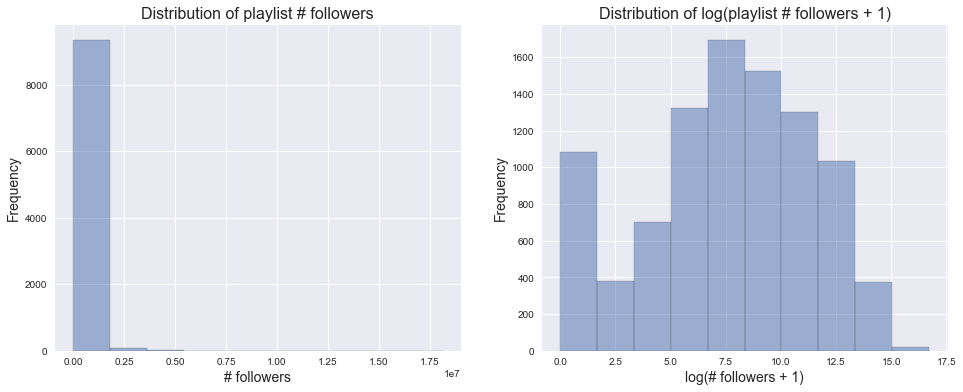

In [4]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

ax[0].hist(df['num_followers'], alpha=0.5, edgecolor = 'black')
ax[0].set_title('Distribution of playlist # followers', fontsize=16)
ax[0].set_xlabel('# followers', fontsize=14)
ax[0].set_ylabel('Frequency', fontsize=14)

ax[1].hist(np.log(list(df['num_followers'] + 1)), alpha=0.5, edgecolor = 'black')
ax[1].set_title('Distribution of log(playlist # followers + 1)', fontsize=16)
ax[1].set_xlabel('log(# followers + 1)', fontsize=14)
ax[1].set_ylabel('Frequency', fontsize=14)

From above, we found that the original `num_followers` distribution is extremely right skewed and that log transformation drastically improves its symmetry. Therefore, we decided to take the log transformation of our response variable, # followers, and store this in a new column `log_num_followers`. We continued our exploratory analysis using `log_num_followers`. 

In [5]:
# Log transformation of num_followers 
df['log_num_followers'] = np.log(list(df['num_followers']+1))

# Dropping the original num_followers
df.drop(['num_followers'], axis=1, inplace=True)

### Checking distributions of the predictors

#### Categorical predictors 
For the categorical predictors, including the mode of `genre`, the mode of track `key`, and the mode of track `time signature`, we counted the number of playlists in each category below. 


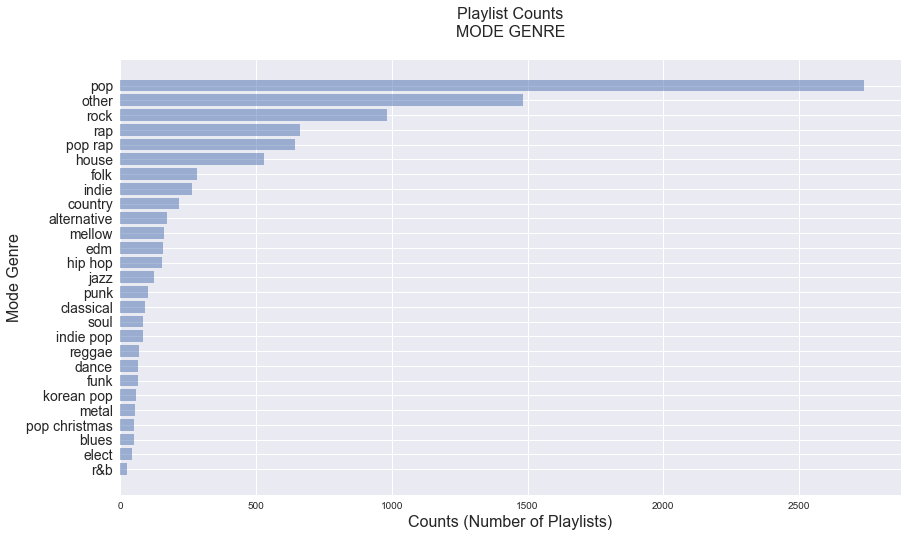

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

genre_counts = pd.value_counts(df['genre'], sort=True, ascending=True)
y_pos = np.arange(len(genre_counts))

ax.barh(y_pos, genre_counts, align='center', alpha=0.5)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(genre_counts.index), fontsize=14)
ax.set_title('Playlist Counts\nMODE GENRE\n', fontsize=16)
ax.set_xlabel('Counts (Number of Playlists)', fontsize=16)
ax.set_ylabel('Mode Genre', fontsize=16)
plt.show()

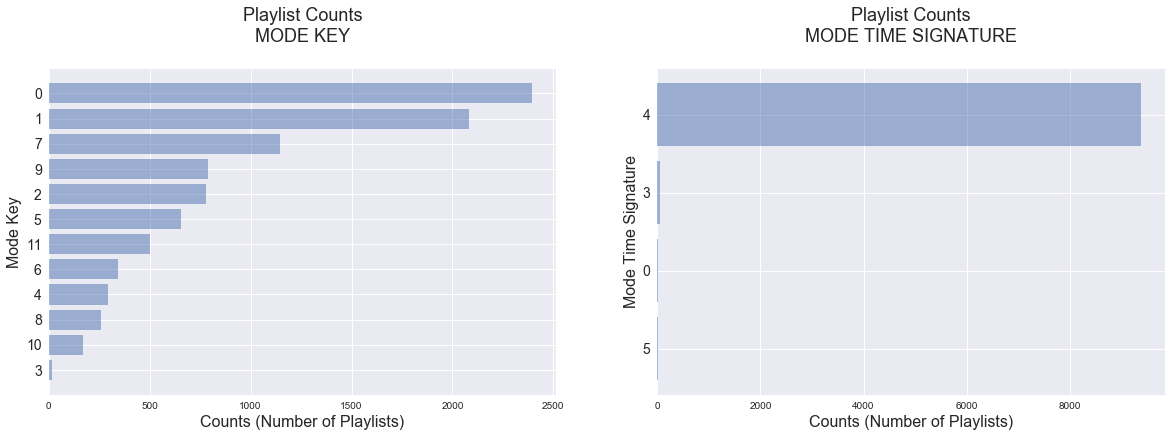

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
key_counts = pd.value_counts(df['track_key_mode'], sort=True, ascending=True)
y_pos_key = np.arange(len(key_counts))

time_sig_counts = pd.value_counts(df['track_time_signature_mode'], sort=True, ascending=True)
y_pos_time = np.arange(len(time_sig_counts))


ax[0].barh(y_pos_key, key_counts, align='center', alpha=0.5)
ax[0].set_yticks(y_pos_key)
ax[0].set_yticklabels(list(key_counts.index), fontsize=14)
ax[0].set_title('Playlist Counts\nMODE KEY\n', fontsize=18)
ax[0].set_xlabel('Counts (Number of Playlists)', fontsize=16)
ax[0].set_ylabel('Mode Key', fontsize=16)

ax[1].barh(y_pos_time, time_sig_counts, align='center', alpha=0.5)
ax[1].set_yticks(y_pos_time)
ax[1].set_yticklabels(list(time_sig_counts.index), fontsize=14)
ax[1].set_title('Playlist Counts\nMODE TIME SIGNATURE\n', fontsize=18)
ax[1].set_xlabel('Counts (Number of Playlists)', fontsize=16)
ax[1].set_ylabel('Mode Time Signature', fontsize=16)

plt.show()

From the plots above, it appears that the playlists we collected are very class inbalanced with most playlsits classified as "pop", most frequent key of 0 and most frequent time signature of 4. This may be due to the fact that Spotify and other msuic streaming platforms are often places where people listen to popular, main stream music. Therefore, the most frequent artist genre (which we take as our playlist and track genre) is likely to be classified as pop, and pop music in general would have common traits (e.g. similar key and time signature). 

We also examined the distribution of playlist diversity. We defined playlist diversity by counting the number of unique occurences of artist genres, keys and time signatures in each of the playlist. We visualized this below.

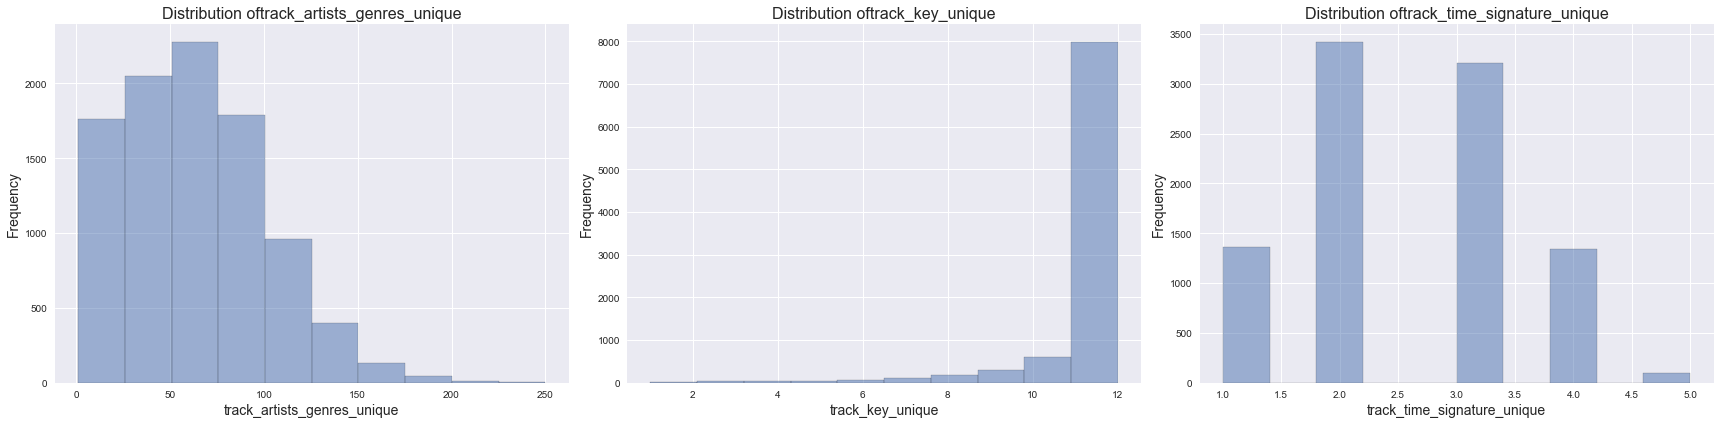

In [8]:
unique_features = ['track_artists_genres_unique', 'track_key_unique', 'track_time_signature_unique']
plot_distribution(df, unique_features, 1, 3, (24,6))

#### Numeric predictors
We classified numeric predictors into 2 different sets: 1) audio features and 2) other features including number of tracks, track popularity, artist popularity, number of available markets, etc., and we visualized them separately.

** Distribution of Audio Features**

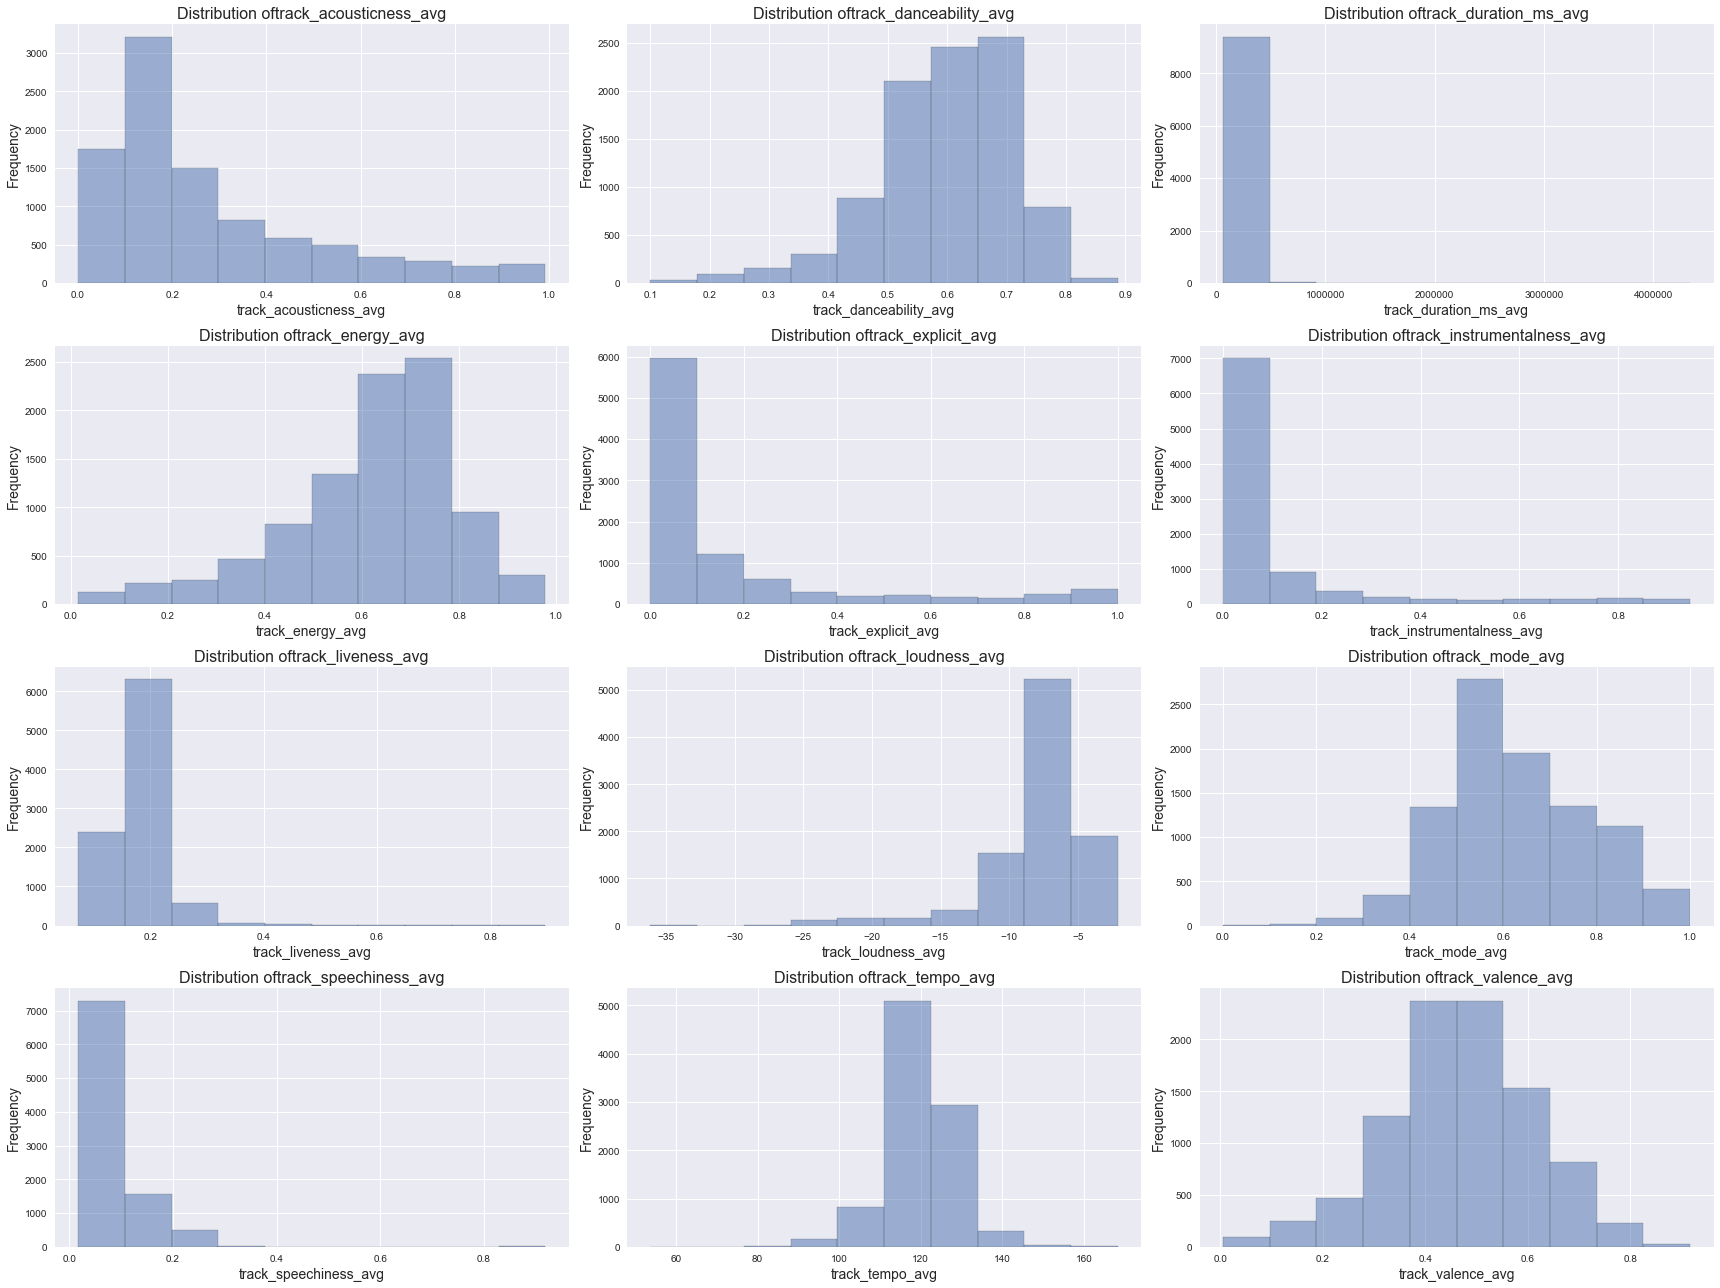

In [9]:
audio_features = ['track_acousticness_avg', 'track_danceability_avg', 'track_duration_ms_avg', 
                'track_energy_avg', 'track_explicit_avg', 'track_instrumentalness_avg', 
                'track_liveness_avg', 'track_loudness_avg', 'track_mode_avg', 'track_speechiness_avg',
                   'track_tempo_avg', 'track_valence_avg']
plot_distribution(df, audio_features, 4, 3, (24,18))

** Distribution of other numeric features**

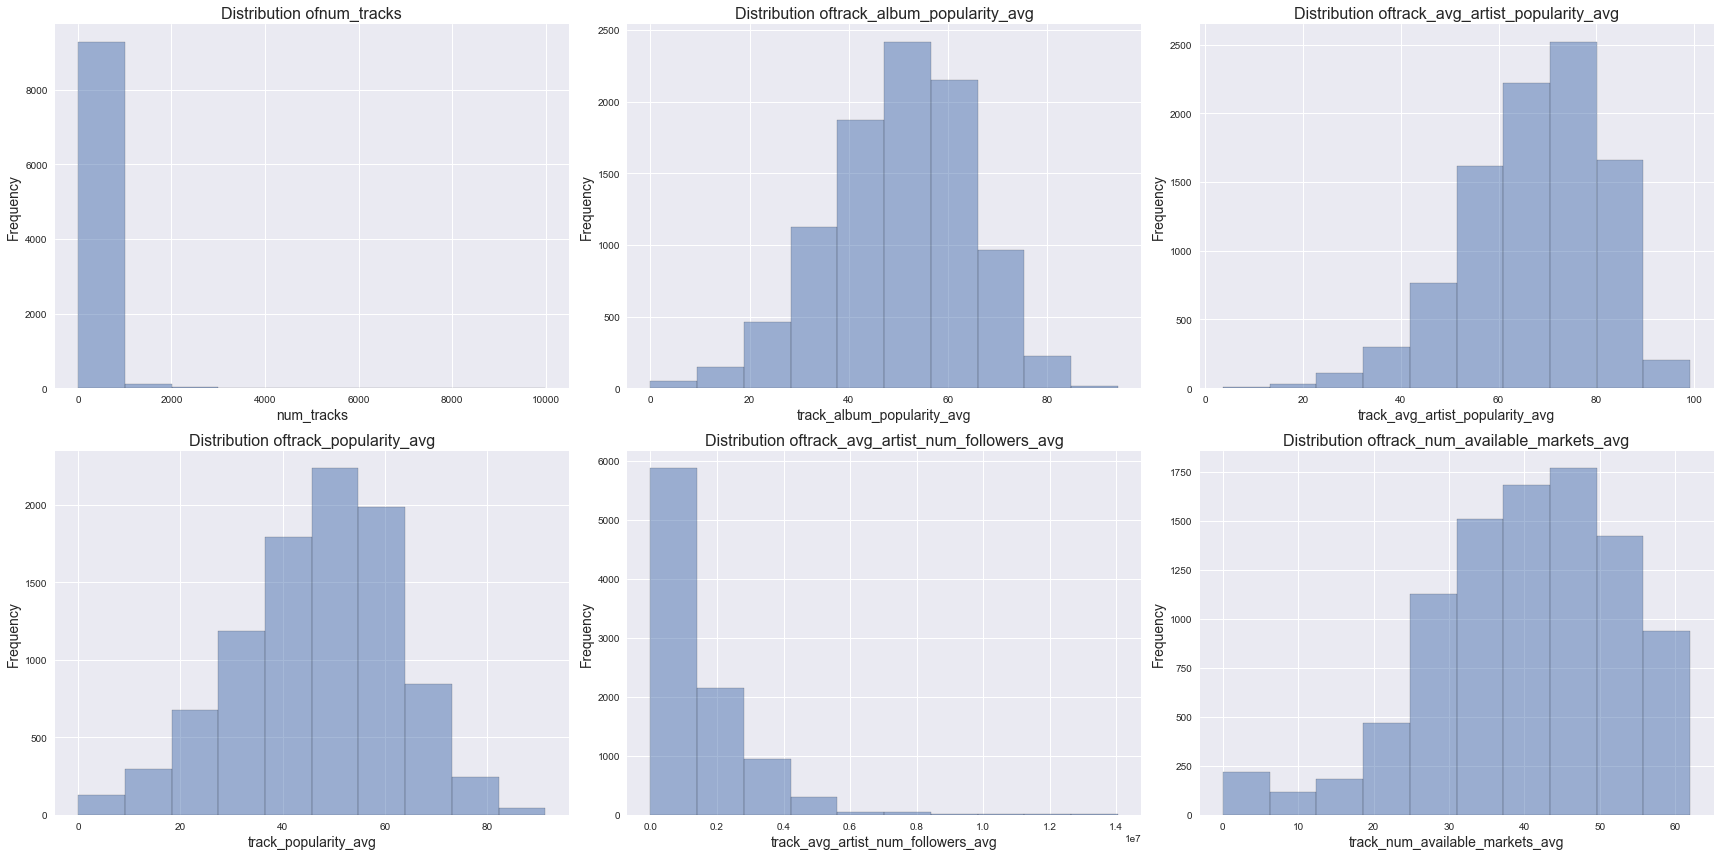

In [10]:
other_features = ['num_tracks', 'track_album_popularity_avg', 'track_avg_artist_popularity_avg', 
                'track_popularity_avg', 'track_avg_artist_num_followers_avg','track_num_available_markets_avg']
plot_distribution(df, other_features, 2, 3, (24,12))

From the histograms above, we found varying degrees of skewness in the predictor distributions.

### Exploring the relationship between response and predictors

#### Response vs. categorical features

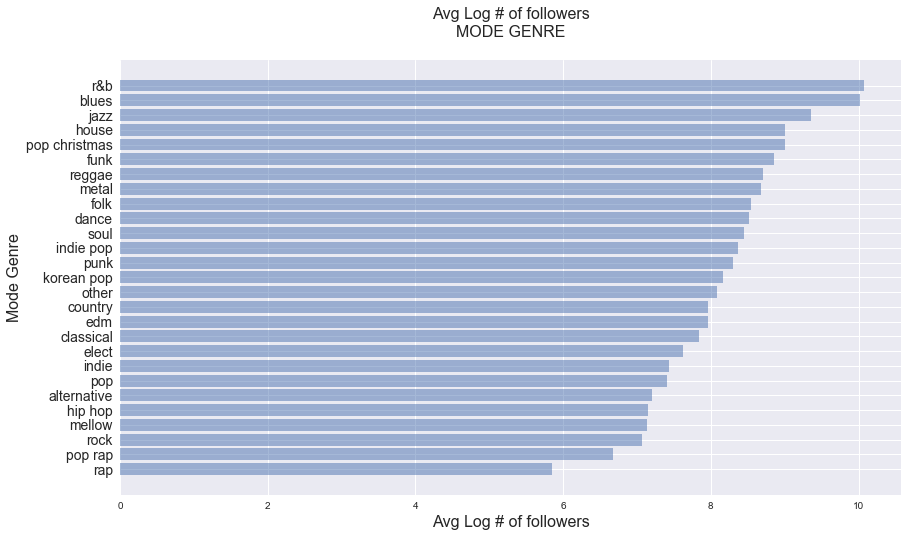

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
genre_follower_avg = df.groupby('genre')['log_num_followers'].apply(lambda x: np.mean(x)).sort_values()
y_pos = np.arange(len(genre_follower_avg))

ax.barh(y_pos, genre_follower_avg, align='center', alpha=0.5)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(genre_follower_avg.index), fontsize=14)
ax.set_title('Avg Log # of followers\nMODE GENRE\n', fontsize=16)
ax.set_xlabel('Avg Log # of followers', fontsize=16)
ax.set_ylabel('Mode Genre', fontsize=16)
plt.show()

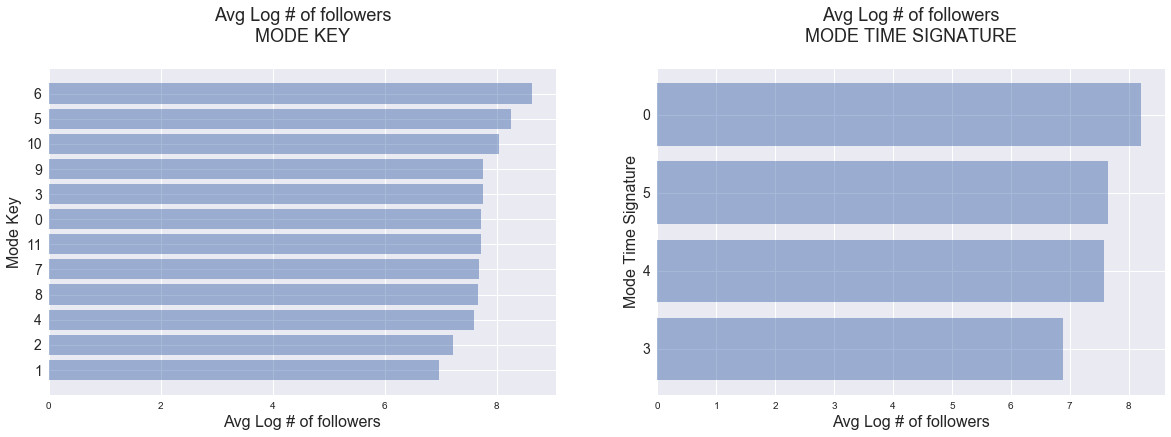

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
key_follower_avg = df.groupby('track_key_mode')['log_num_followers'].apply(lambda x: np.mean(x)).sort_values()
y_pos_key = np.arange(len(key_follower_avg))

time_sig_follower_avg = df.groupby('track_time_signature_mode')['log_num_followers'].apply(lambda x: np.mean(x)).sort_values()
y_pos_time = np.arange(len(time_sig_follower_avg))

ax[0].barh(y_pos_key, key_follower_avg, align='center', alpha=0.5)
ax[0].set_yticks(y_pos_key)
ax[0].set_yticklabels(list(key_follower_avg.index), fontsize=14)
ax[0].set_title('Avg Log # of followers\nMODE KEY\n', fontsize=18)
ax[0].set_xlabel('Avg Log # of followers', fontsize=16)
ax[0].set_ylabel('Mode Key', fontsize=16)

ax[1].barh(y_pos_time, time_sig_follower_avg, align='center', alpha=0.5)
ax[1].set_yticks(y_pos_time)
ax[1].set_yticklabels(list(time_sig_follower_avg.index), fontsize=14)
ax[1].set_title('Avg Log # of followers\nMODE TIME SIGNATURE\n', fontsize=18)
ax[1].set_xlabel('Avg Log # of followers', fontsize=16)
ax[1].set_ylabel('Mode Time Signature', fontsize=16)

plt.show()

From the visualizations above, it appears that the response, `log_num_followers`, is associated with all categorical variables.

#### Response vs. selected numeric features

#### By popularities

It is intuitive to hypothesize that average track popularity may have a high positive correlation with the number of followers a playlist has (i.e. higher average track popularity means high number of followers). Therefore, we first visualized `log_num_follwers` by 6 different types of popuarlities:
- **average popularity** of all **tracks** in the playlist
- **average popularity** of the **albums** of the tracks in the playlist
- **average popularit**y of the **artists** of the tracks in the playlist

- **max popularity** of all **tracks** in the playlist
- **max popularity** of the **albums** of the tracks in the playlist
- **max popularit**y of the **artists** of the tracks in the playlist

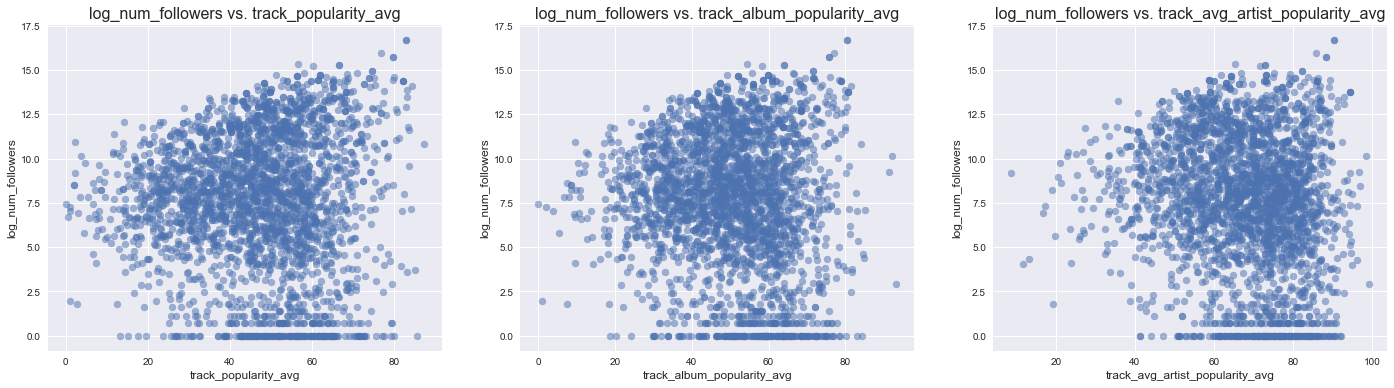

In [13]:
# popularity vs response
# visualize relationship between 'popularity' variables and the response variable
avg_popularity_predictors = ['track_popularity_avg', 'track_album_popularity_avg', 'track_avg_artist_popularity_avg']
scatterplot_followers_vs_predictors(df, avg_popularity_predictors, (24,6))

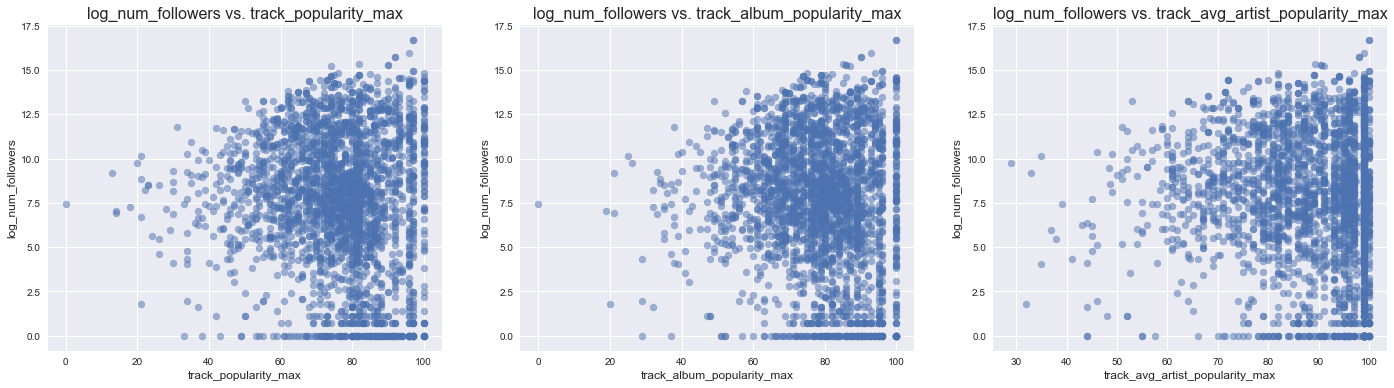

In [14]:
# popularity vs response
# visualize relationship between 'popularity' variables and the response variable
max_popularity_predictors = ['track_popularity_max', 'track_album_popularity_max', 'track_avg_artist_popularity_max']
scatterplot_followers_vs_predictors(df, max_popularity_predictors, (24,6))

While there seems to be an association between all 6 different kinds of popularities, none of the correlation appears to be strong.

#### By selected audio features

Next, we visualized the pair-wise relationship between the averages of all the audio features and the response.

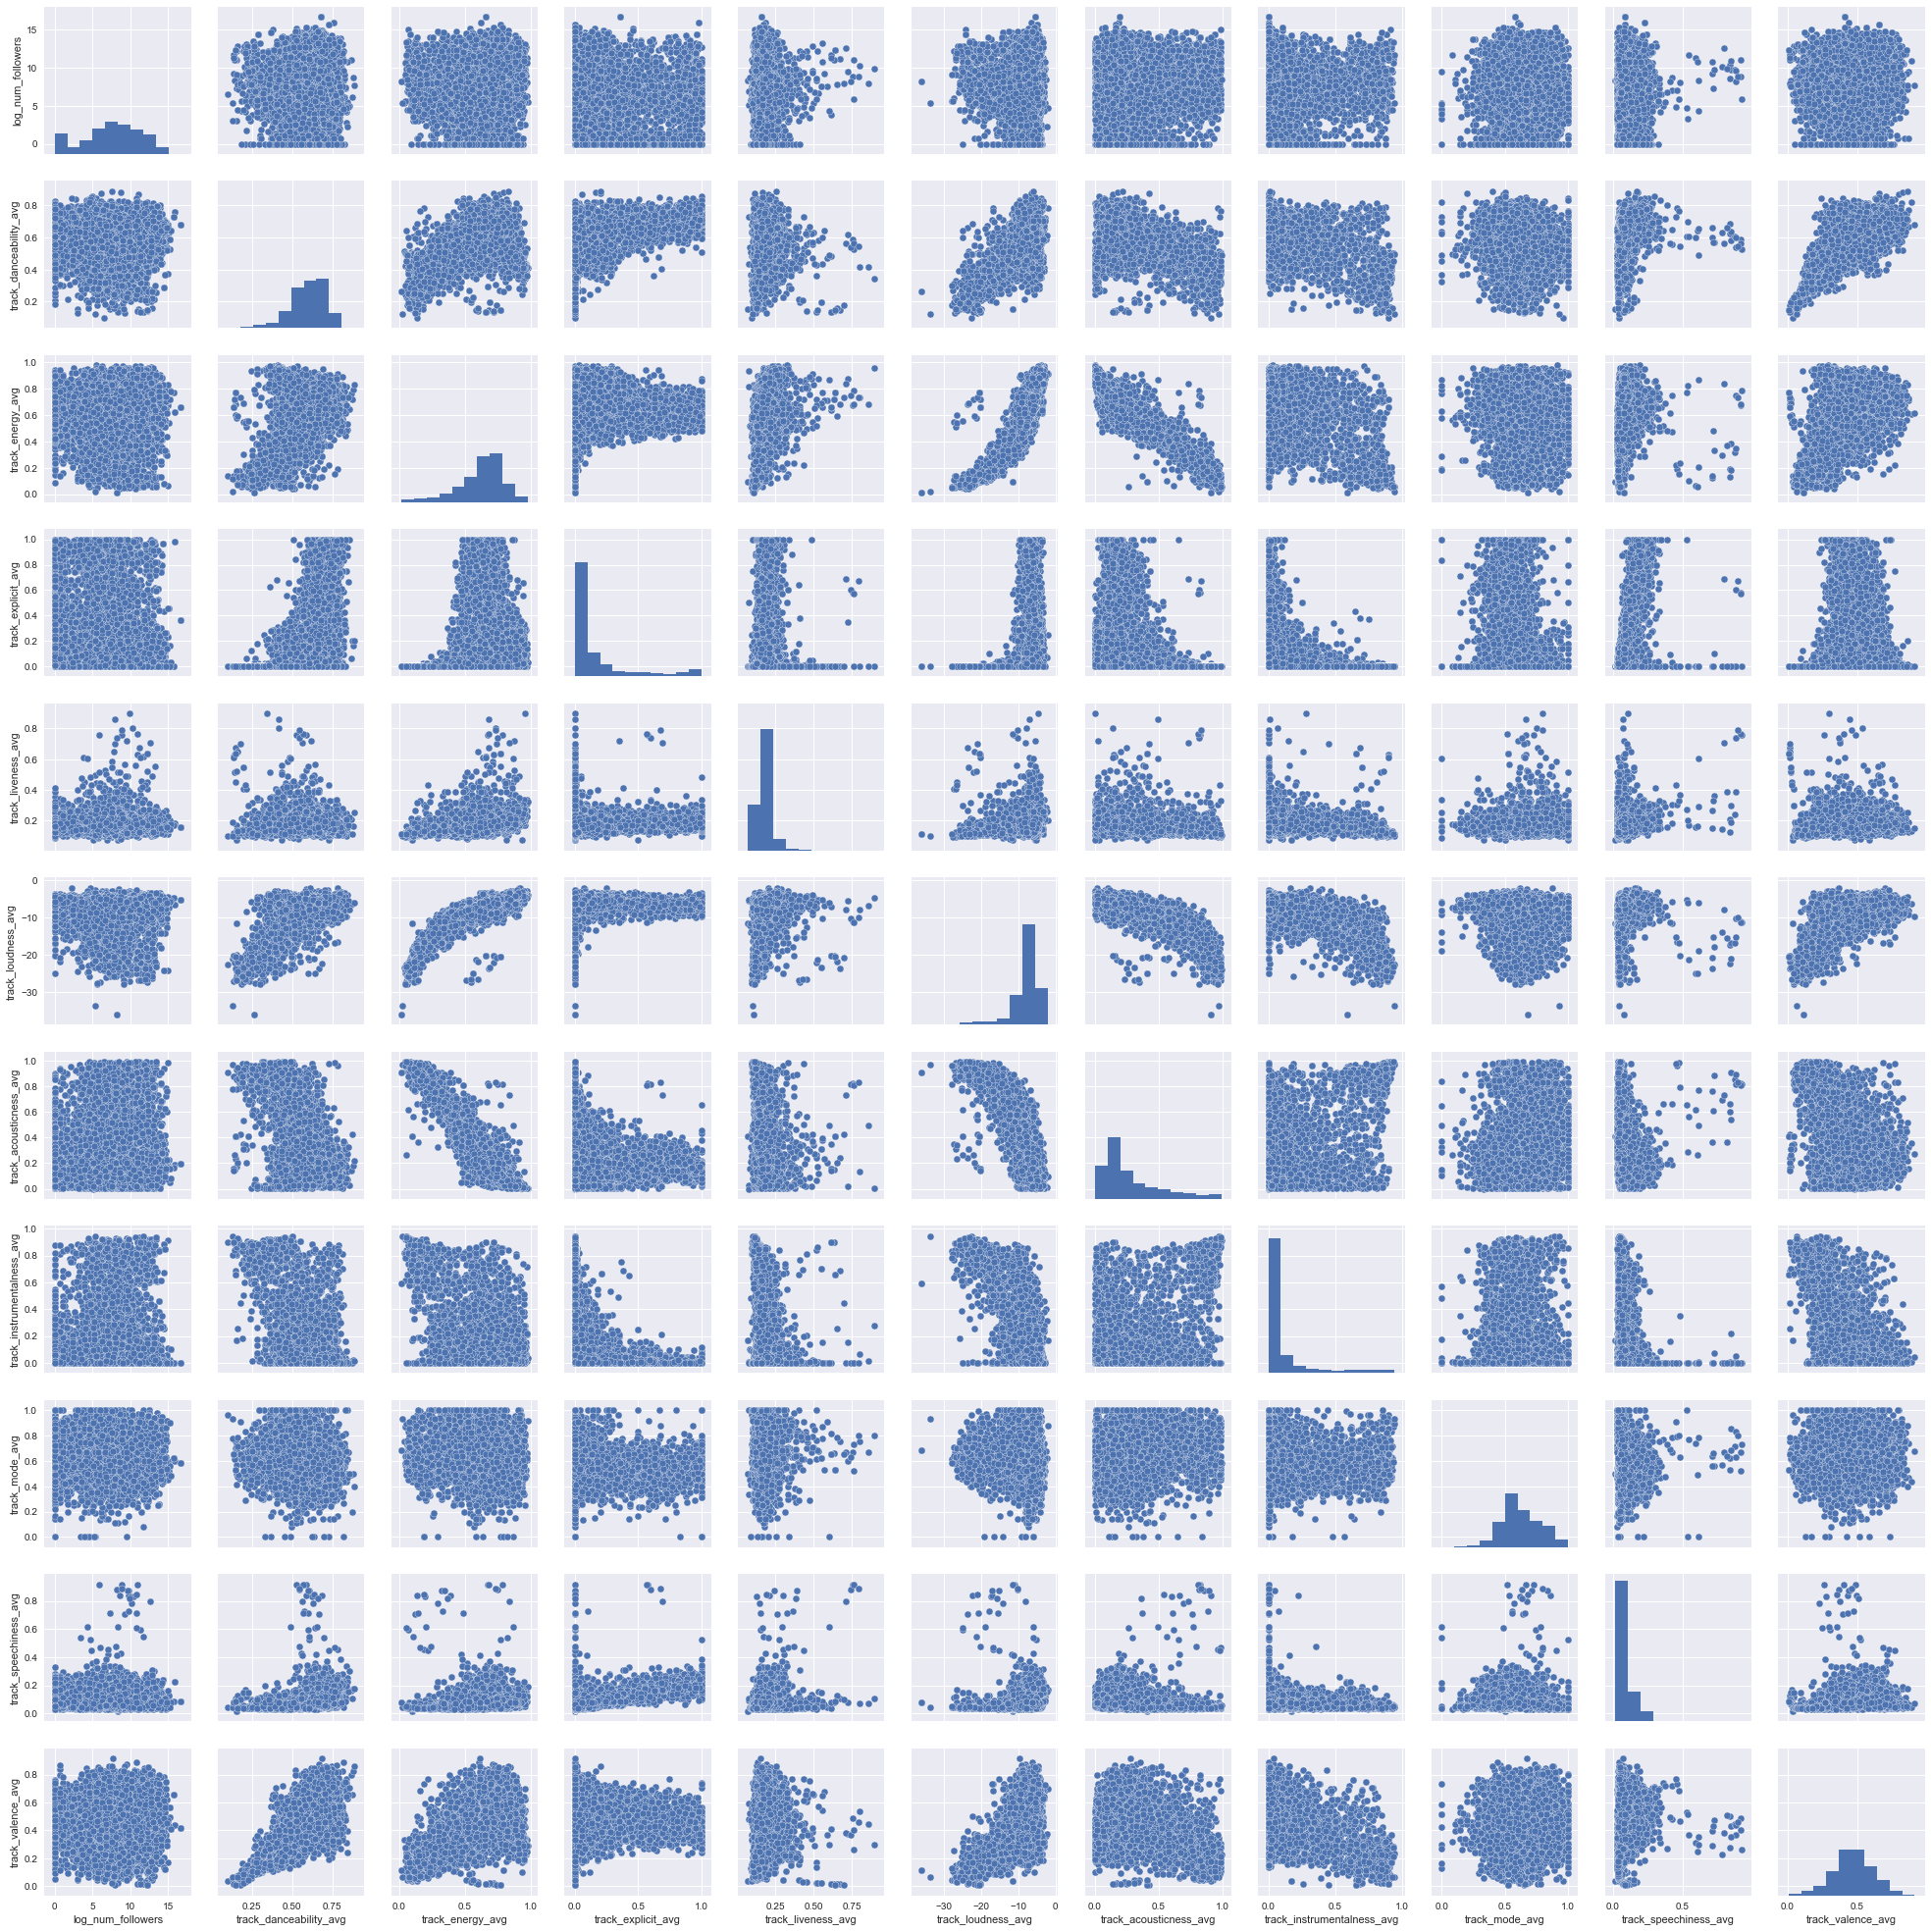

In [15]:
#pair plot shows that some predictors are highly correlated and do not have a trend with log_num_followers so we
#choose to group our observation by genre
pair_plot_features = ['log_num_followers','track_danceability_avg', 'track_energy_avg', 
                      'track_explicit_avg', 'track_liveness_avg', 'track_loudness_avg', 'track_acousticness_avg',
                      'track_instrumentalness_avg','track_mode_avg','track_speechiness_avg', 'track_valence_avg']
sns.pairplot(df[pair_plot_features])

Unsurprisingly, the plots revealed high multicollinearity between many of the audio features. This is expected because loud songs also tend to be energic, for instance. 

In addition, the plots revealed that audio features overall do not correlate very much with the response. This is also intuitive because audio features are likely to be different in different genres, but there are popular and unpopular playlists in all genres, effectively cancelling out any potential correlation/trend with the response when overall audio features are considered. Therefore, we perofrm exploratory analysis by genre in the next section.

## Exploratory analysis by genre

### Distribution of audio features by genre

It is clear from both the boxplots and the parallel coordiate plots below that audio features in different genres cluster together. **This strongly suggests that we should pursue interaction terms between genre and all of the audio features when we build our regression model.**

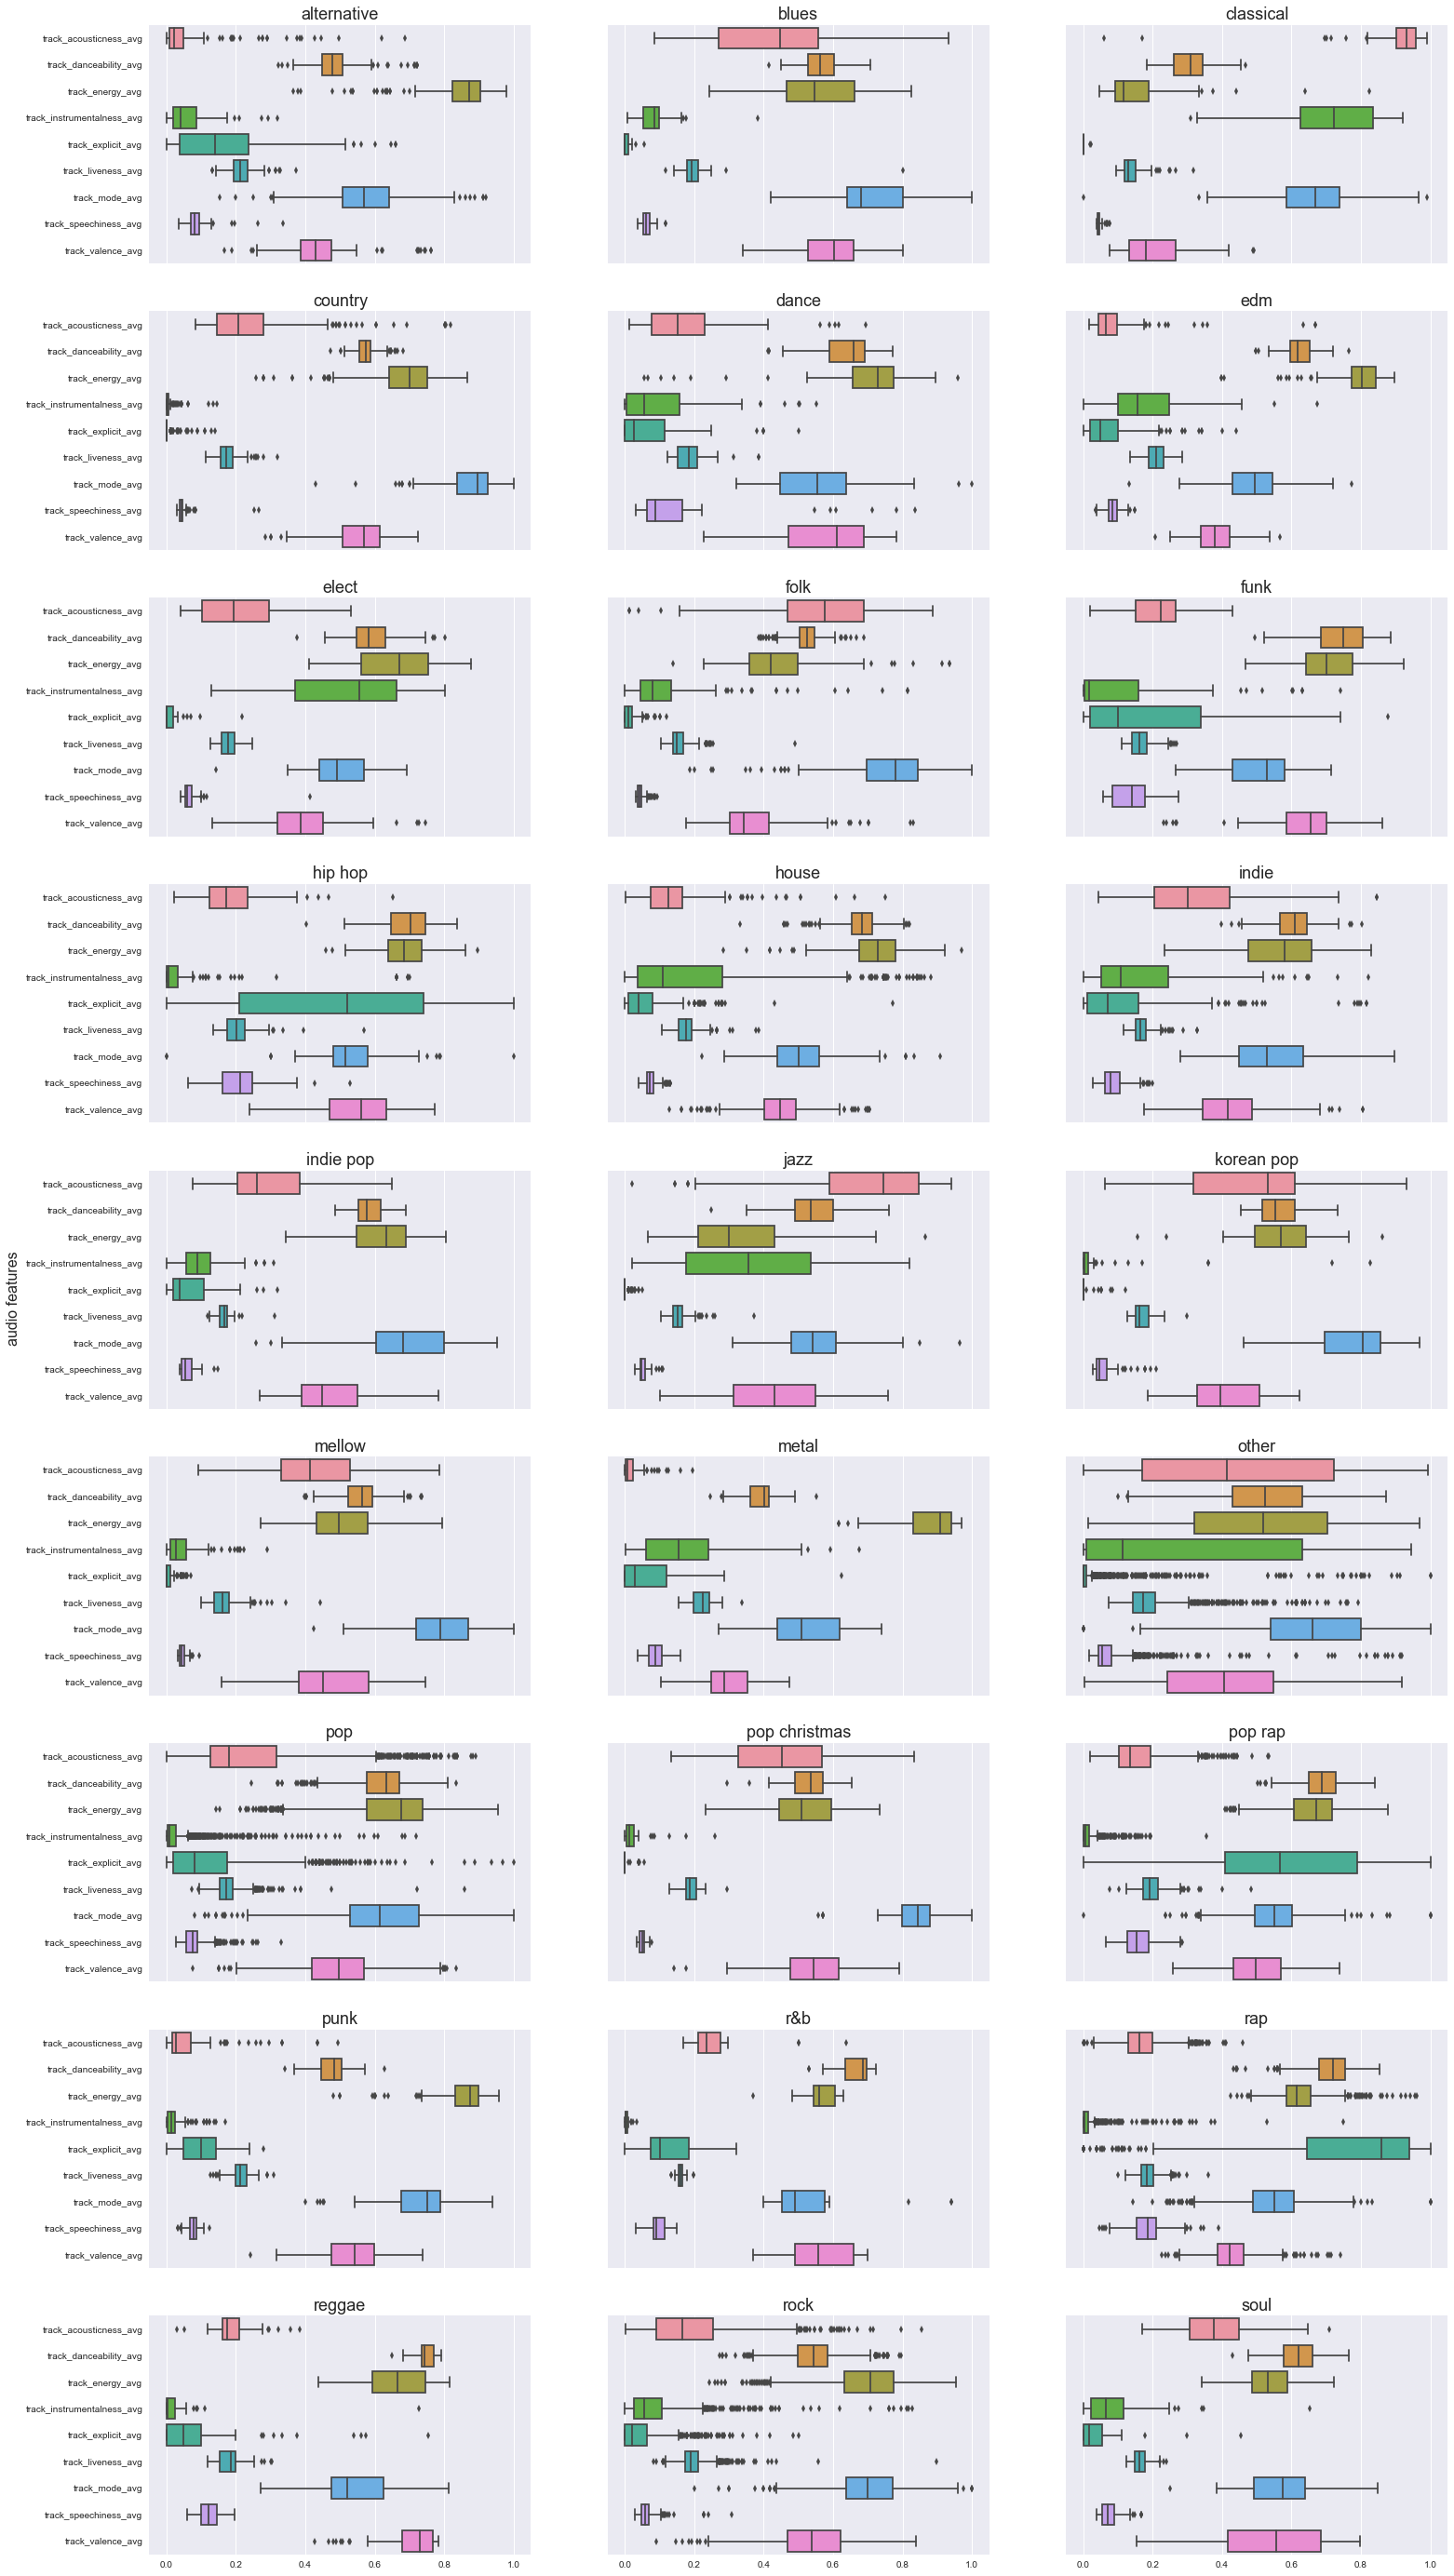

In [16]:
# boxplt for each genre showing different audio feature distribution --> interaction between audio feature and
# genre could be useful
boxplot_audio_features_by_genre(df)

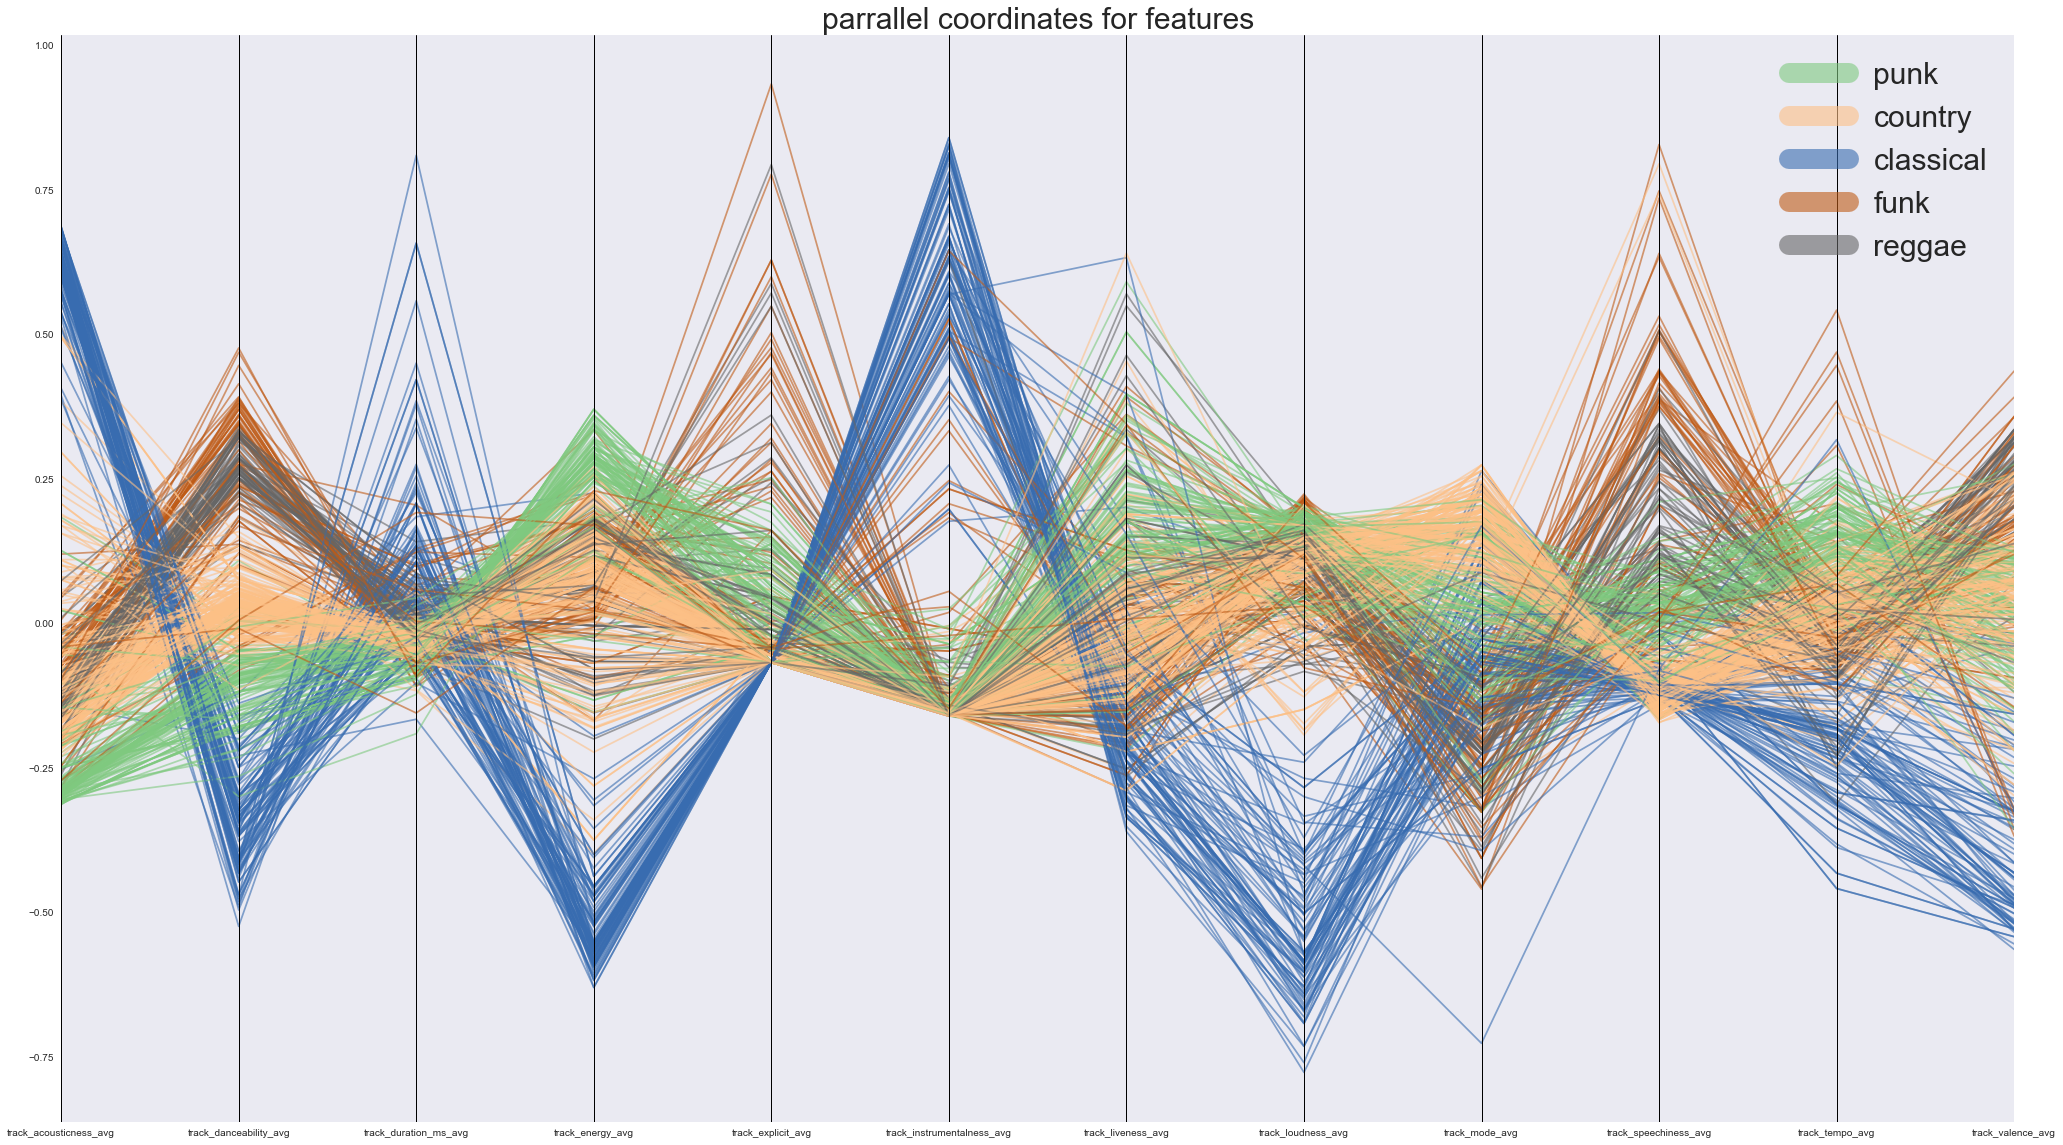

In [17]:
# parallel coordinates for numeric features
selected_genres = ['classical', 'funk', 'punk', 'reggae', 'country']
plot_parallel_coordinates(df, selected_genres, audio_features, (35,20))

Note: Since plotting every single genre (24 of them) would compromise the clarity of the parallel coordinate plot, we only plotted 5 genres to make our point.

### Distribution of other numeric features (popularities, number of available markets...etc) by genre

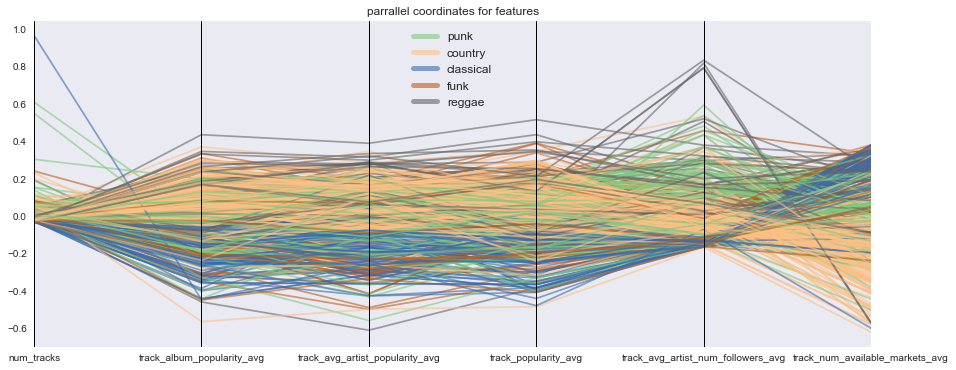

In [18]:
# parallel coordinates for numeric features
plot_parallel_coordinates(df, selected_genres, other_features, (15,6), fontsize = 12, line_width = 5)

From the parallel coordinate plot above, other numeric features do not appear to cluster based on genre, suggesting that interaction terms between genre and these features are not likely to contribute to predictive model building. 

### Relationship between audio features and response

Below, we only show the scatterplots of response vs. selected audio features in selected genres because there are too many combinations to show (We appeneded the plots for ONE feature in all genres against the response in the appendix of this page). In each of the scatterplot, we also drew a horizontal line in order to facilitate the detection of an association with the response. 

** The main finding from these scatterplots is that different genres have different sets of audio features that appear to have an association with the response.** For instance, there seems to be a negative correlation between the response and valend (middle column) in classical music (1st row) but no apparent correlation in country music (the 2nd row).

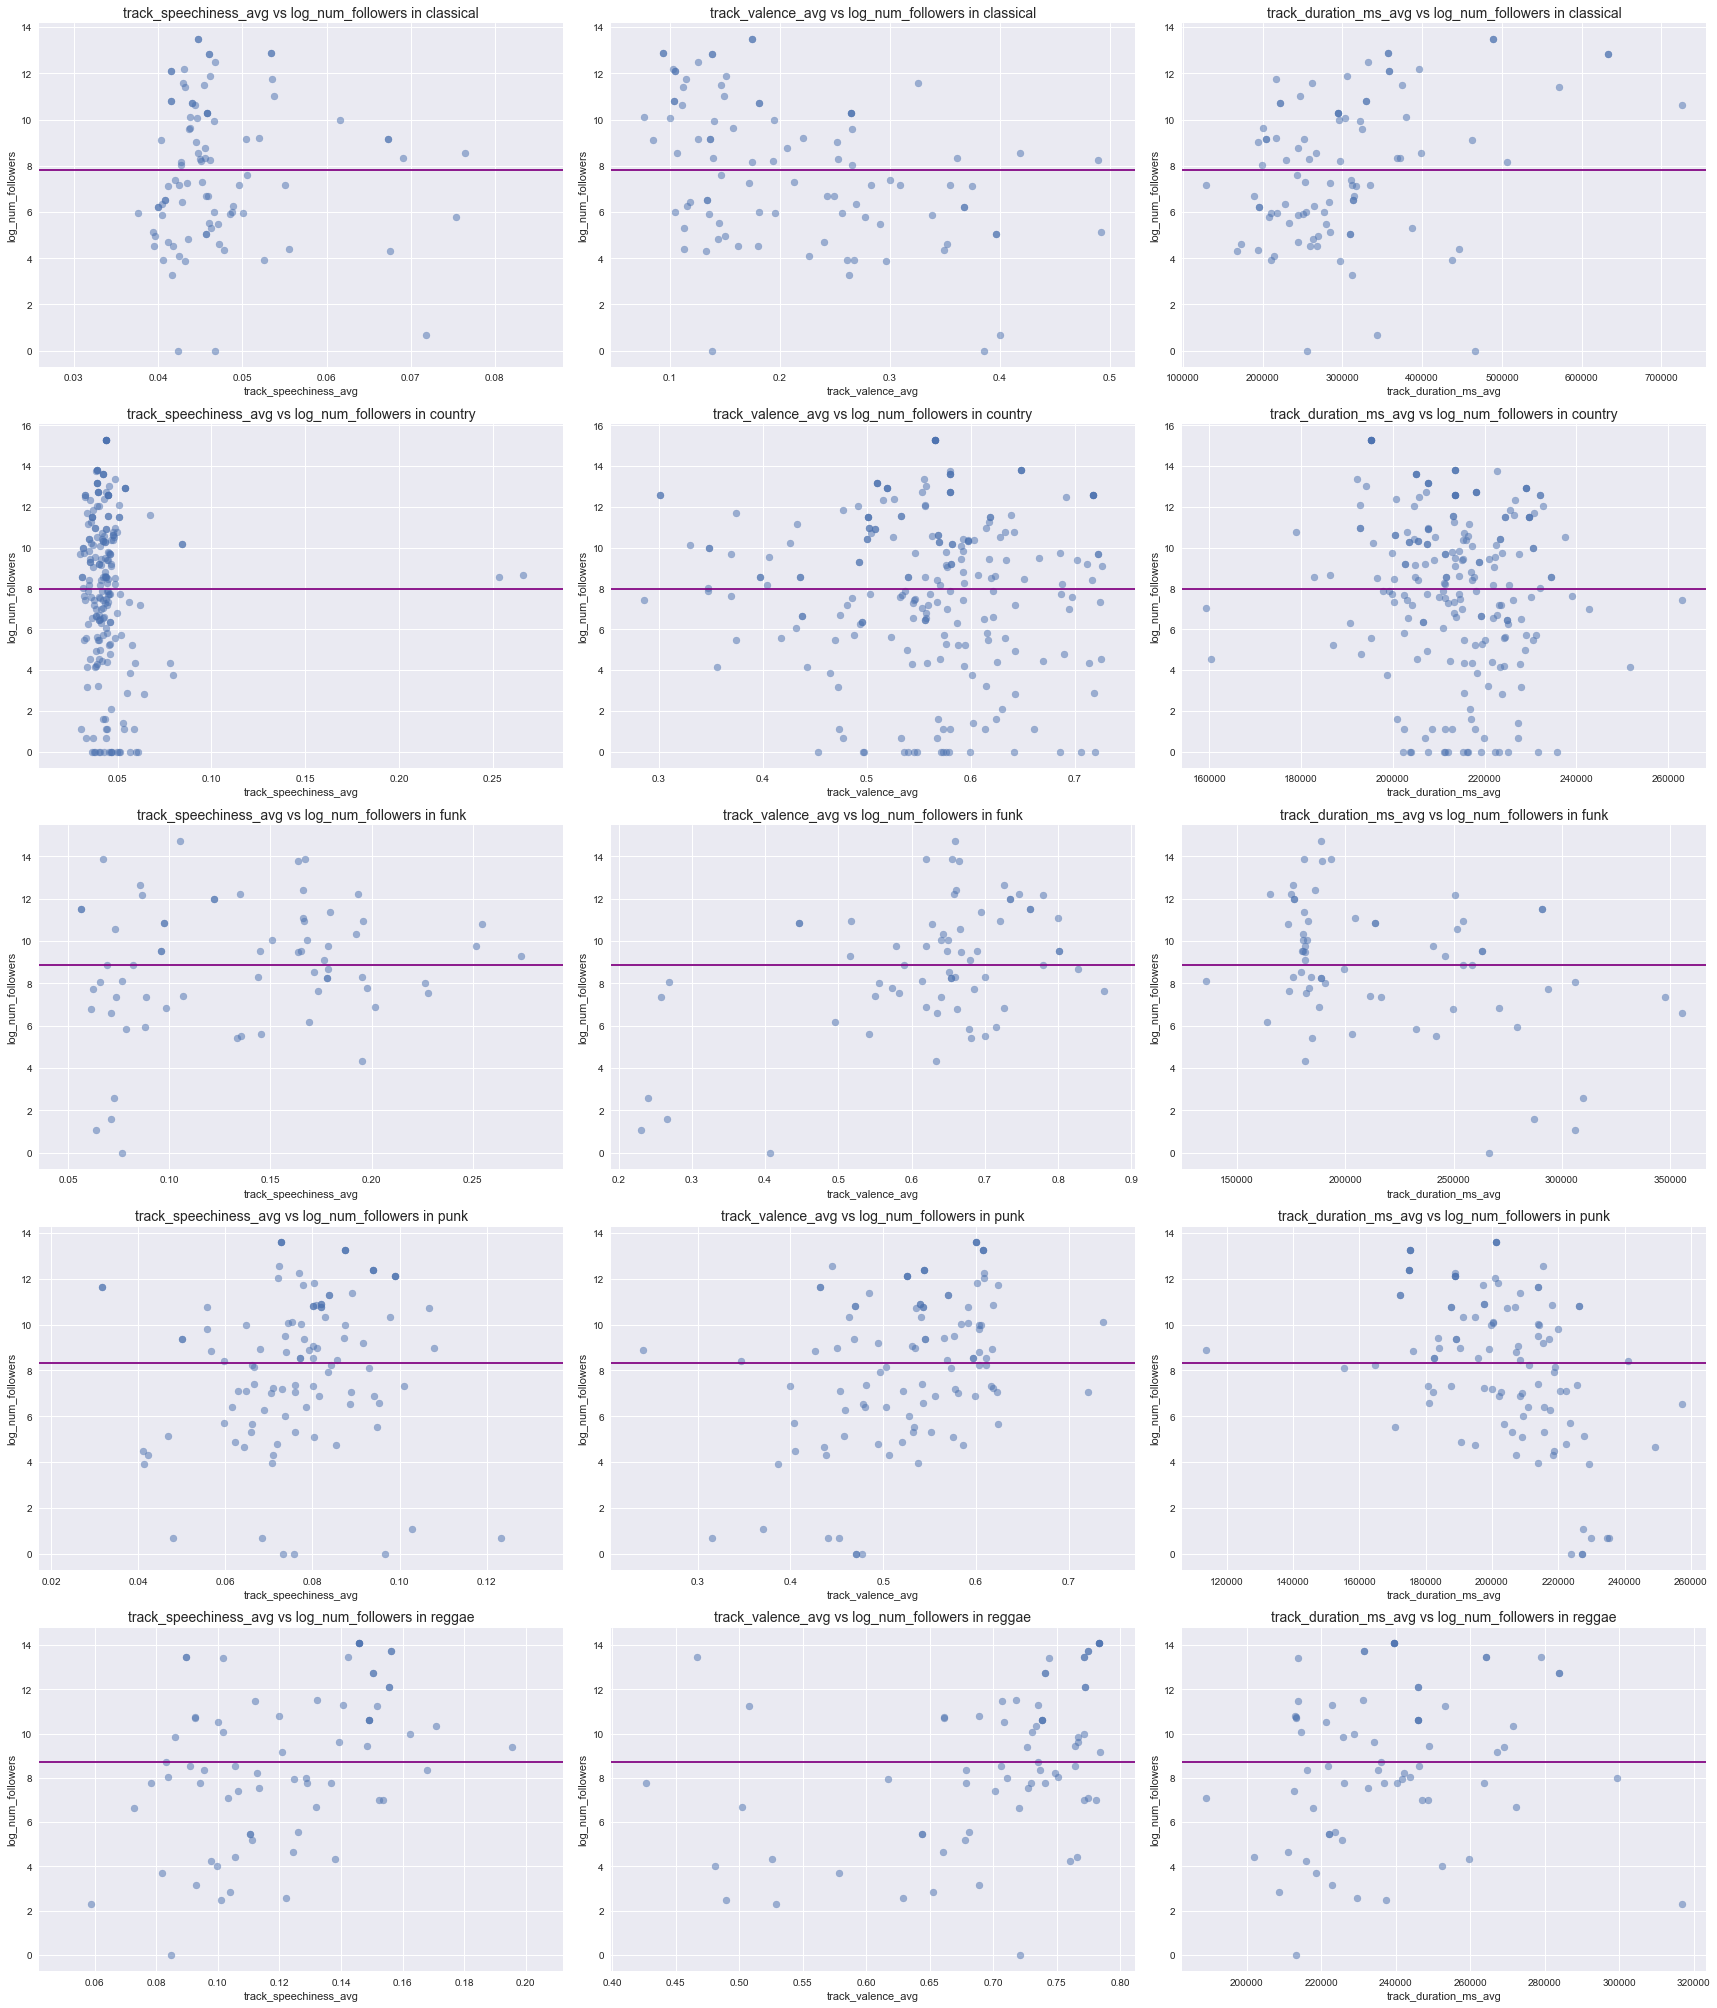

In [19]:
# plot for informative audio features against response variable after visualizing all audio features against
# the response
query_features = ['track_speechiness_avg', 'track_valence_avg', 'track_duration_ms_avg']
query_genres = ['classical', 'country', 'funk', 'punk', 'reggae', ]
selected_plot_features_in_genres(df, query_genres, query_features)

## Visualizing by PCA
Another goal of EDA is to determine whether PCA is a potentially useful approach to building a predictive model. To do this, we first build a preliminary PCA dataframe with all 2-way interaction terms, follwoing these steps:

- One-hot encode categorical variables
- Create 2-way interaction terms
- Drop columns where there is only 0 and standardize continues variables 
- Create 2 component PCA fit/transform
- Visualize the 2 component PCA and color by whether log_num_follower of a playlist falls in the top 20%

In [20]:
# Drop the response variable and unused varaible 'collaborative'
df_interaction = df.drop(['log_num_followers', 'collaborative'], axis=1)
categorical_predictors = ['genre', 'track_time_signature_mode', 'track_key_mode']
numerical_predictors = list(set(df_interaction.columns.values) - set(categorical_predictors))

# One-hot encode categorical features
df_interaction= pd.get_dummies(df_interaction, prefix = categorical_predictors, columns = categorical_predictors, drop_first = True)

# Generate 2-way interaction terms
gen_cross_terms = PolynomialFeatures(interaction_only=True, include_bias=False) 
cross_term_features = gen_cross_terms.fit_transform(df_interaction)
cross_term_feature_names = gen_cross_terms.get_feature_names(df_interaction.columns)
df_interaction = pd.DataFrame(cross_term_features, columns = cross_term_feature_names)

# Drop columns that has only 0 and standardize continuous variables
for col in df_interaction.columns:
    if (df_interaction[col] == 0).all():
        df_interaction.drop(col, axis=1, inplace=True)
    else:
        # Check if it is a continuouse variable
        if not np.logical_or((df_interaction[col]==0), ((df_interaction[col]==1))).all():
            # Standardize if continuous
            df_interaction[col] = (df_interaction[col] - df_interaction[col].mean())/df_interaction[col].std()
df_interaction['log_num_followers'] = df['log_num_followers']
df_interaction.head()

num_tracks  track_acousticness_avg  track_acousticness_std  \
0   -0.325456               -0.409603               -0.347287   
1   -0.254032               -0.572283               -0.477156   
2   -0.368932               -0.694301               -1.020583   
3   -0.362721               -0.616663                0.610059   
4   -0.406197               -0.450999                0.390329   

   track_album_popularity_avg  track_album_popularity_max  \
0                    1.497485                    1.263133   
1                    1.270521                    1.551865   
2                    1.549993                    1.118767   
3                    0.469185                    0.252572   
4                    0.219028                   -1.768552   

   track_album_popularity_std  track_artists_genres_unique  \
0                   -0.721784                    -0.074739   
1                   -0.273670                     0.186188   
2                   -0.145110                    -0.492223   
3                    0.211835                     0.890692   
4                   -3.106687                    -1.509839   

   track_avg_artist_num_followers_avg  track_avg_artist_num_followers_std  \
0                           -0.067524                           -0.175148   
1                            1.570796                            1.575572   
2                            0.611812                            0.511364   
3                            0.656111                            1.523867   
4                           -0.843402                           -0.988396   

   track_avg_artist_popularity_avg        ...          \
0                         1.057178        ...           
1                         1.231252        ...           
2                         1.376190        ...           
3                         0.392538        ...           
4                        -0.893026        ...           

   track_time_signature_mode_4 track_key_mode_4  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   track_time_signature_mode_4 track_key_mode_5  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   track_time_signature_mode_4 track_key_mode_6  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           1.0   
4                                           0.0   

   track_time_signature_mode_4 track_key_mode_7  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   track_time_signature_mode_4 track_key_mode_8  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   track_time_signature_mode_4 track_key_mode_9  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           1.0   

   track_time_signature_mode_4 track_key_mode_10  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3               

In [21]:
# Fit 2 component PCA
pca = PCA(n_components=2)
X_interaction_pca = pca.fit_transform(df_interaction.iloc[:, :-1])
X_interaction_pca.shape, df_interaction.shape

((9430, 2), (9430, 3169))

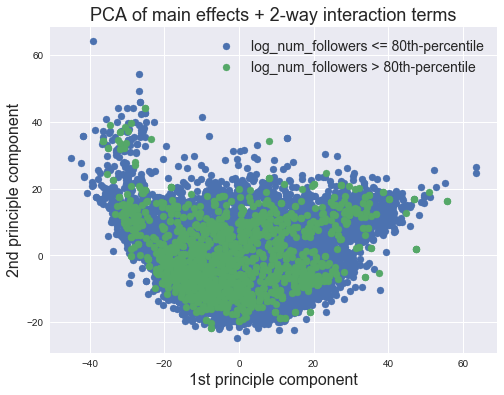

In [22]:
# Plot 1st 2 PCA components
fig, ax = plt.subplots(1, 1, figsize = (8, 6))

# Define success threshold to be 80th percentile of log_num_followers 
success_threshold = np.percentile(df_interaction['log_num_followers'], 80)

ax.scatter(X_interaction_pca[df_interaction['log_num_followers']<=success_threshold][:, 0], X_interaction_pca[df_interaction['log_num_followers']<=success_threshold][:, 1], label='log_num_followers <= 80th-percentile')
ax.scatter(X_interaction_pca[df_interaction['log_num_followers']>success_threshold][:, 0], X_interaction_pca[df_interaction['log_num_followers']>success_threshold][:, 1], label='log_num_followers > 80th-percentile')

ax.legend(fontsize=14)
ax.set_title('PCA of main effects + 2-way interaction terms', fontsize=18)
ax.set_xlabel('1st principle component', fontsize=16)
ax.set_ylabel('2nd principle component', fontsize=16)

From the PCA plot, it is clear that there is no separation between the top 20% and the bottom 80% using the top 2 PCA components fitted on all possible 2-way interaction terms.

## EDA Summary

In conclusion, our exploratory data analysis revealed the following:

1. **Global Data Analysis**
     - Variable Distribution Analysis 
         - Response variable: We found extreme right skewness in the response variable, which prompted us to take its log transformation. We used this log-transformed variable (`log_num_followers`) in all subsequent analyses. 
         - Categorical predictor variables: We found that the playlists are fairly inbalanced (i.e. they are overwhelmingly of the pop `genre` and mode key of 0 with a mode time signature of 4. This may have some bearings in how predictive our model is in less represented genres/mode keys/ mode time signatures. 
         - Numeric predictor variables: Numeric predictors have varying degrees of skewness, ranging from extremely right skewed to fairly normally distributed.
     - Response vs. Predictor Variable:
         - Categorical predictor variables: We found that all categorical features (`genre`, `mode key`, and `mode time signature`) are associated with `log_num_followers`
         - Numeric predictor variables: We found that `log_num_followers` of a playlist has weak associations with all 6 different measures of its content popularity (i.e. **average track**, **average album**, **average artist** and **max track**, **max album** and **max artist** popularities). In addition, we found varying degrees of multicollinearity between audio features. Finally we found that when overall audio features are considered, no audio feature seems to have any apparent correlation with `log_num_followers`.

2. **Exploratory Analysis by Genre**
    - Distribution of Audio Features by Genre: From both boxplots and parallel coordinate plots, we found that audio features clearly clusters by genre. This is a strong indication that we whould consider interaction terms between `genre` and audio features going forward.
    - Distribution of Other Numeric Features by Genre: We found no apparent clustering by genre in other numeric features such as the popularity features and number of available markets, suggesting interaction terms between `genre` and these features are likely not going to be useful.
    - Relationship between Audio Features and Response by Genre: We found that ertain numerical features appear to be associated with the response only in certain genres and not in others. This again suggests that adding interaction terms between `genre` and audio features may help to improve the predictive performance of the regression model. 
 
3. **Visualizing by PCA**: We found no separability between playlists that have the the top 20% `log_num_followers` and the bottom 80% `log_num_followers` using the top 2 PCA components fitted on all possible 2-way interaction terms.

## Appendix
This appeneded scatter plot shows ONE audio feature (i.e. `track_speechiness_avg`) in each genre against the reponse variable `log_num_followers`. We plotted one such plot for each of the audio features and realized that for a given audio feature, there seems to be an association in certain genres but not in other genres. Therefore, we handpicked a few representative plots to demonstrate our point above in section ** Relationship between audio features and response **.

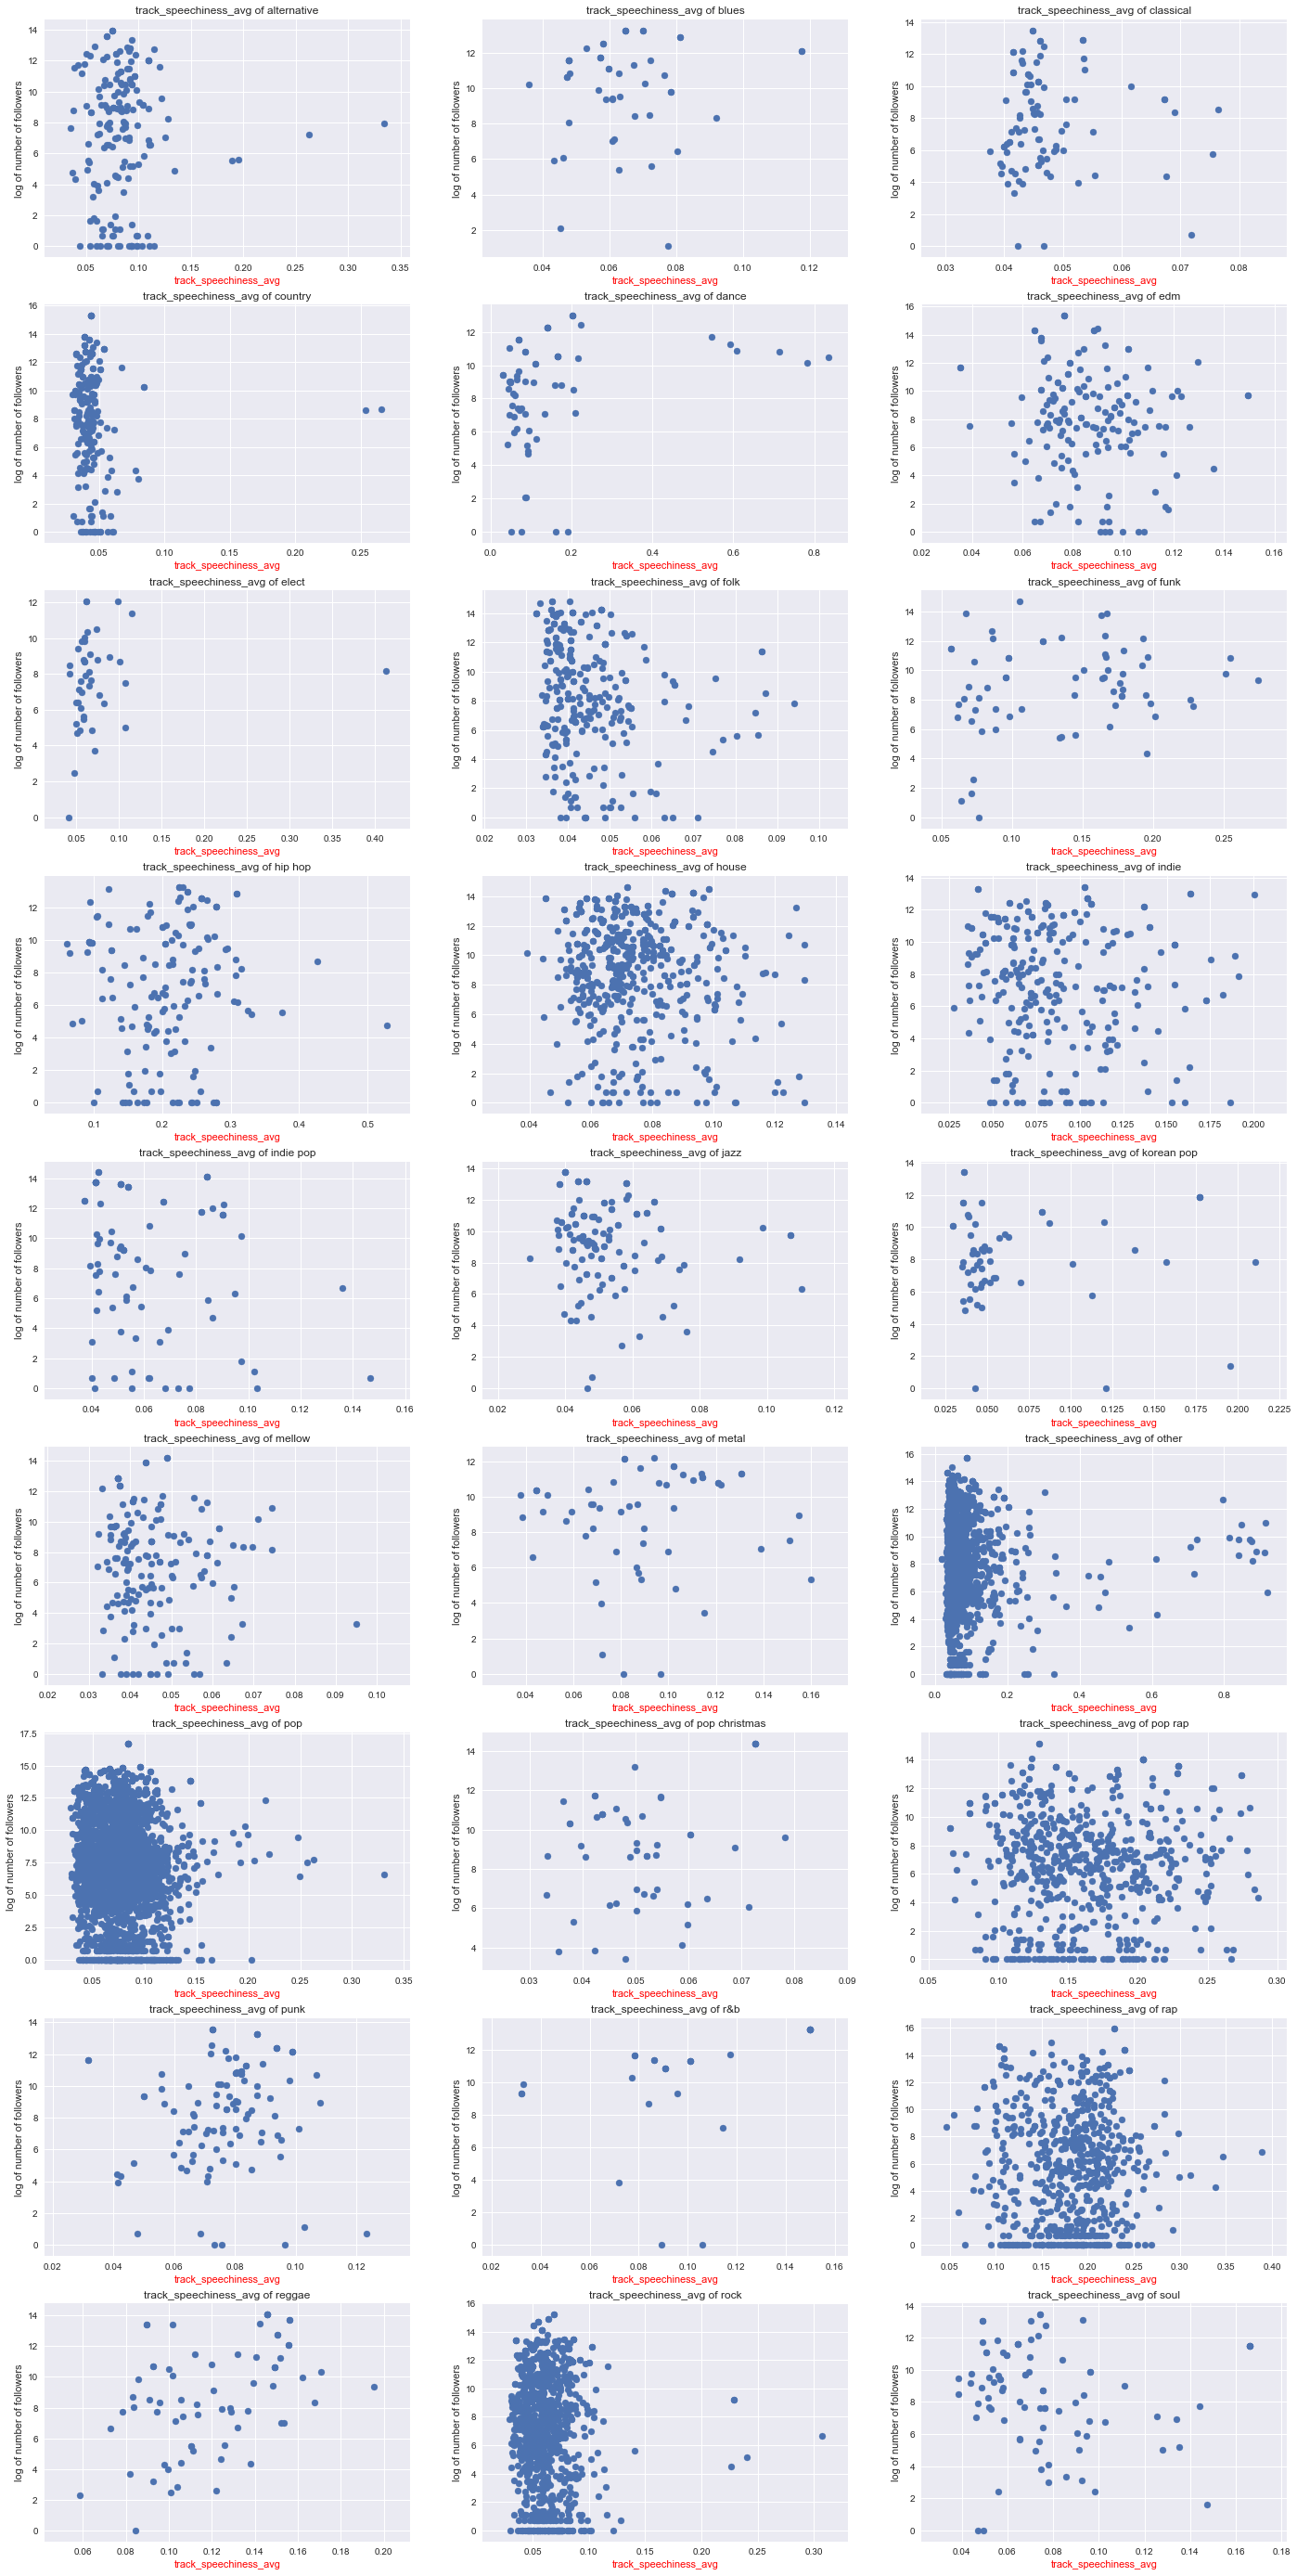

In [23]:
# Appendix: feature exploration in each genre 
plot_feature_in_genre(df, 'track_speechiness_avg')